# Numerical solution of the heat equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
a = 0
b = 1
c = 0
d = 1


def u(x, t):
    return np.exp(x - t)

def f(x, t):
    return -2 * np.exp(x - t)

def u_0(x):
    return np.exp(x)

def mu_0(t):
    return np.exp(-t)

def mu_1(t):
    return np.exp(1 - t)

In [75]:
def plot_graphs(x, t, u, y):
    T, X = np.meshgrid(t, x)
    
    fig = plt.figure()
    plt.figure(figsize=(12, 8))
    
    ax = plt.axes(projection='3d')
    ax.contour3D(X, T, u, 100, cmap='Greens')
    ax.contour3D(X, T, y, linewidths=3, cmap='Oranges')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u/y')
    plt.show()

### Explicit difference scheme

In [15]:
h_1 = 0.1
tau_1 = 0.1
h_2 = 0.1
tau_2 = h_2 ** 2 / 2

In [16]:
def explicit_scheme(a, b, c, d, f, h, tau):
    N1 = round((b - a) / h)
    N2 = round((d - c) / tau)
    x = [h * i for i in range(N1 + 1)]
    t = [tau * j for j in range(N2 + 1)]
    y = np.zeros((N1 + 1, N2 + 1))
    for i in range(N1 + 1):
        y[i][0] = u_0(x[i])
    for j in range(N2):
        y[0][j + 1] = mu_0(t[j + 1])
        y[N1][j + 1] = mu_1(t[j + 1])
        for i in range(1, N1):
            y[i][j + 1] = tau * ((y[i + 1][j] - 2 * y[i][j] + y[i - 1][j]) / h ** 2 + f(x[i], t[j])) + y[i][j]
    return x, t, y

In [17]:
x_1, t_1, y_1 = explicit_scheme(a, b, c, d, f, h_1, tau_1) 

u_1 = [[u(xi, ti) for ti in t_1] for xi in x_1]
print(np.abs(np.subtract(u_1, y_1)).max())

68664291929.682014


<Figure size 432x288 with 0 Axes>

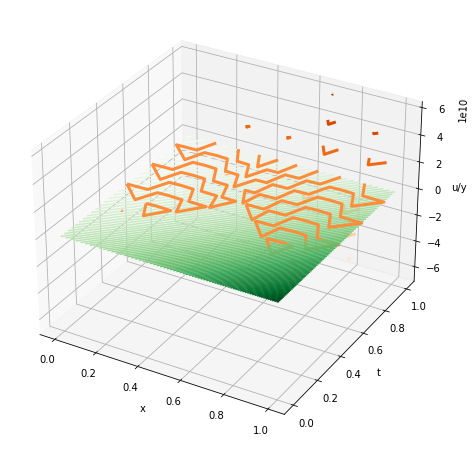

In [18]:
plot_graphs(x_1, t_1, u_1, y_1)

In [19]:
x_2, t_2, y_2 = explicit_scheme(a, b, c, d, f, h_2, tau_2) 

u_2 = [[u(xi, ti) for ti in t_2] for xi in x_2]
print(np.abs(np.subtract(u_2, y_2)).max())ss

0.0002713512621073111


<Figure size 432x288 with 0 Axes>

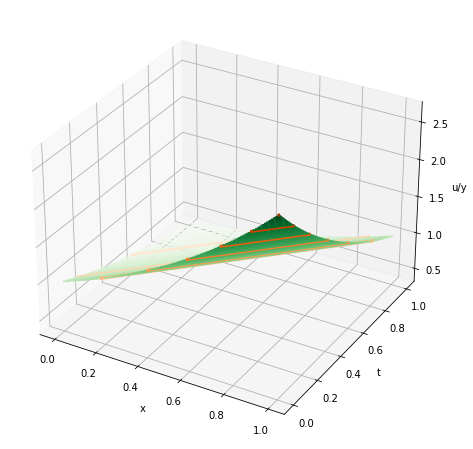

In [20]:
plot_graphs(x_2, t_2, u_2, y_2)

### Implicit difference scheme

In [21]:
h = 0.1
tau = 0.1

In [93]:
def sweep_method(a, c, b, f, N):
    alpha = [0] * (N + 1)
    beta = [0] * (N + 1)
    y = [0] * (N + 1) 
    alpha[1] = b[0] / c[0]
    beta[1] = f[0] / c[0]
    
    for i in range(1, N):
        alpha[i + 1] = b[i] / (c[i] - alpha[i] * a[i])
        beta[i + 1] = (f[i] + a[i] * beta[i]) / (c[i] - alpha[i] * a[i])
    
    y[N] = (f[N] + a[N] * beta[N]) / (c[N] - alpha[N] * a[N])
    for i in range(N - 1, -1, - 1):
        y[i] = alpha[i + 1] * y[i + 1] + beta[i + 1]
    
    return y


def implicit_scheme(a, b, c, d, f, sigma, h, tau):
    N1 = round((b - a) / h)
    N2 = round((d - c) / tau)
    x = [h * i for i in range(N1 + 1)]
    t = [tau * j for j in range(N2 + 1)]
    y = np.zeros((N1 + 1, N2 + 1))
    for i in range(N1 + 1):
        y[i][0] = u_0(x[i])
    for j in range(N2):
        a_sweep = [sigma / h ** 2] * (N1 + 1)
        b_sweep = [sigma / h ** 2] * (N1 + 1)
        c_sweep = [1 / tau + 2 * sigma / h ** 2] * (N1 + 1)
        f_sweep = [0] * (N1 + 1)
        
        c_sweep[0] = 1
        b_sweep[0] = 0
        f_sweep[0] = mu_0(t[j + 1])
        a_sweep[N1] = 0
        c_sweep[N1] = 1
        f_sweep[N1] = mu_1(t[j + 1])
        
        for i in range(1, N1):
            f_sweep[i] = y[i][j] / tau + (1 - sigma) * (y[i + 1][j] - 2 * y[i][j] + y[i - 1][j]) / h ** 2 + f(x[i], t[j] + (1 - sigma) * tau)

        y[:, j + 1] = sweep_method(a_sweep, c_sweep, b_sweep, f_sweep, N1)
    return x, t, y

In [94]:
sigma = 1
x, t, y = implicit_scheme(a, b, c, d, f, sigma, h, tau)

u_values = [[u(xi, ti) for ti in t] for xi in x]
print(np.abs(np.subtract(u_values, y)).max())

0.02266481546554222


<Figure size 432x288 with 0 Axes>

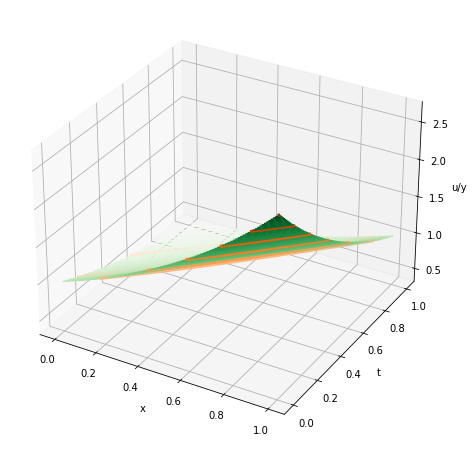

In [95]:
plot_graphs(x, t, u_values, y)

### Crank-Nicolson scheme

In [100]:
sigma = 0.5
x, t, y = implicit_scheme(a, b, c, d, f, sigma, h, tau)

u_values = [[u(xi, ti) for ti in t] for xi in x]
print(np.abs(np.subtract(u_values, y)).max())

0.00041528770255938596


<Figure size 432x288 with 0 Axes>

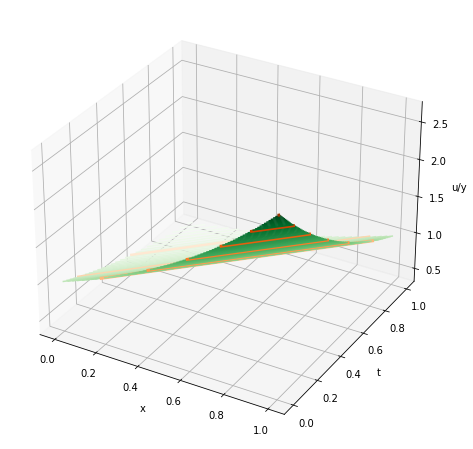

In [101]:
plot_graphs(x, t, u_values, y)